In [1]:
!pip install torchtext==0.8.1

In [2]:
import torch
import torch.nn as nn
import torchtext.data as ttd
from torchtext.vocab import GloVe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
df = pd.read_csv('/content/train_data_merged_labels.csv', header=0)


In [4]:
df.head()

,utterances,Core Relations
0,who plays luke on star wars new hope,movie.starring.actor_movie.starring.character
1,show credits for the godfather,movie.starring.actor
2,who was the main actor in the exorcist,movie.starring.actor
3,who played dory on finding nemo,movie.starring.actor_movie.starring.character
4,who was the female lead in resident evil,actor.gender_movie.starring.actor


In [5]:
from itertools import chain

unique_relations = []
for i in range(0,len(df['Core Relations'])):
  unique_relations.append(df['Core Relations'][i].rsplit('_',1))

unique_relations = list(set(list(chain.from_iterable( unique_relations ))))
print(unique_relations)
 # = chain.from_iterable( df['Core Relations'] )

['movie.initial_release', 'movie.locations', 'movie.directed_by_movie.initial_release', 'movie.gross', 'movie.genre_movie.initial_release', 'movie.starring.character', 'movie.initial_release_date', 'movie.initial_release_date_movie.production', 'movie.initial_release_date_movie.produced', 'movie.genre', 'movie.rating', 'birth', 'movie.country_movie.genre', 'date', 'by', 'movie.directed_by_movie.estimated', 'movie.produced', 'movie.language', 'none', 'revenue', 'gr.amount_movie.gross', 'movie.production_companies', 'movie.music', 'movie.directed_by_movie.produced', 'movie.directed', 'movie.estimated', 'person.date_of', 'companies', 'movie.directed_by', 'movie.country', 'movie.subjects', 'budget', 'actor.gender', 'movie.production', 'movie.produced_by_movie.production', 'movie.genre_movie.gross', 'movie.country_movie.genre_movie.language', 'movie.genre_movie.production', 'movie.starring.actor']


In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


enc = preprocessing.LabelEncoder()
df['Encoded Relations'] = enc.fit_transform(df['Core Relations'])
df1 = df[['utterances','Encoded Relations']]
df1

,utterances,Encoded Relations
0,who plays luke on star wars new hope,42
1,show credits for the godfather,41
2,who was the main actor in the exorcist,41
3,who played dory on finding nemo,42
4,who was the female lead in resident evil,0
...,...,...
2248,revenue for titanic,26
2249,total titanic revenues,26
2250,what was the revenue for toy story 3,26
2251,dark knight revenue,26


In [82]:
pd.set_option('display.max_rows', 5000)
print(df[['Core Relations','Encoded Relations']][df['Encoded Relations']==39].head(1))
#print(df[['Core Relations','Encoded Relations']][df['Core Relations']=='movie.starring.actor'].head(1))

    Core Relations  Encoded Relations
693   movie.rating                 39


In [7]:
df2 = pd.read_csv('/content/test_data.csv', header=0)
df2

,utterances
0,star of thor
1,who is in the movie the campaign
2,list the cast of the movie the campaign
3,who was in twilight
4,who is in vulguria
...,...
976,trailer for star wars a new hope
977,show resident evil movies with trailers
978,can i see previews for upcoming warner brother...
979,how many woody allen movies are set in new yor...


In [8]:
df1.to_csv('train.csv', index=False)

In [ ]:
TEXT = ttd.Field(
    sequential=True,
    batch_first=True,
    lower=True,
    tokenize='spacy',
    use_vocab=True,
    pad_first=True)
LABEL = ttd.Field(sequential=False, use_vocab=False, lower=True, is_target=True)

# Note: if you don't specify use_vocab=False, then PyTorch will
# complain later when you try to iterate over the dataset that
# the attribute `vocab` doesn't exist.

# Note 2: if you don't specify is_target=True, then PyTorch will
# assume it's part of the input, so when you iterate over the
# dataset it will be like:
# for (inputs, targets), _ in iterator:
# where the 2nd element (_) should have been the target.

dataset = ttd.TabularDataset(
    path='train.csv',
    format='csv',
    skip_header=True,
    fields=[('utterances', TEXT), ('Encoded Relations', LABEL)]
)

In [10]:
dataset.fields

{'Encoded Relations': <torchtext.data.field.Field at 0x7f5281606090>,
 'utterances': <torchtext.data.field.Field at 0x7f531420d590>}

In [11]:
train_dataset, test_dataset = dataset.split(split_ratio=0.85) # default is 0.7

In [12]:
len(train_dataset)

1915

In [13]:
len(test_dataset)

338

In [14]:
print(train_dataset[0].__dict__.keys())
print(train_dataset[0].__dict__.values())

dict_keys(['utterances', 'Encoded Relations'])
dict_values([['who', 'directed', 'the', 'movie', 'opening', 'night'], '9'])


In [15]:
TEXT.build_vocab(train_dataset,vectors = 'glove.6B.100d')
LABEL.build_vocab(train_dataset)

In [16]:
len(LABEL.vocab)

45

In [17]:
len(TEXT.vocab)

1069

In [18]:
LABEL.vocab.freqs

Counter({'0': 8,
         '1': 3,
         '11': 3,
         '12': 5,
         '13': 1,
         '14': 1,
         '15': 1,
         '16': 6,
         '17': 1,
         '18': 56,
         '19': 82,
         '2': 117,
         '20': 1,
         '21': 1,
         '22': 3,
         '23': 1,
         '24': 4,
         '25': 3,
         '26': 21,
         '27': 120,
         '28': 1,
         '29': 6,
         '3': 4,
         '30': 11,
         '31': 9,
         '32': 114,
         '33': 1,
         '34': 3,
         '35': 142,
         '37': 69,
         '38': 1,
         '39': 161,
         '4': 5,
         '41': 248,
         '42': 16,
         '43': 2,
         '44': 75,
         '45': 271,
         '46': 4,
         '5': 1,
         '6': 56,
         '7': 1,
         '8': 2,
         '9': 274})

In [19]:
TEXT.vocab.vectors.size()

torch.Size([1069, 100])

In [20]:
print(TEXT.vocab.vectors)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0382, -0.2449,  0.7281,  ..., -0.1459,  0.8278,  0.2706],
        ...,
        [-0.1194,  0.5419,  0.6217,  ..., -0.3805, -0.0422,  0.3516],
        [-0.4198, -0.1956, -0.2468,  ..., -0.4826, -0.6925, -0.5460],
        [-0.7497,  0.3603,  0.9107,  ...,  0.1232,  0.2503, -0.1138]])


In [21]:
vocab = TEXT.vocab

In [22]:
vocab.stoi

defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x7f5280255c50>>,
            {'<unk>': 0,
             '<pad>': 1,
             'the': 2,
             'movies': 3,
             'of': 4,
             'movie': 5,
             'me': 6,
             'in': 7,
             'what': 8,
             'show': 9,
             'for': 10,
             'find': 11,
             'who': 12,
             'i': 13,
             'is': 14,
             'to': 15,
             'by': 16,
             'a': 17,
             'list': 18,
             'produced': 19,
             'was': 20,
             'directed': 21,
             'about': 22,
             'are': 23,
             'want': 24,
             'with': 25,
             'all': 26,
             'director': 27,
             'information': 28,
             'can': 29,
             'when': 30,
             'will': 31,
             'films': 32,
             'did': 33,
             'search': 34,
             'made': 35,
   

In [23]:
vocab.itos

['<unk>',
 '<pad>',
 'the',
 'movies',
 'of',
 'movie',
 'me',
 'in',
 'what',
 'show',
 'for',
 'find',
 'who',
 'i',
 'is',
 'to',
 'by',
 'a',
 'list',
 'produced',
 'was',
 'directed',
 'about',
 'are',
 'want',
 'with',
 'all',
 'director',
 'information',
 'can',
 'when',
 'will',
 'films',
 'did',
 'search',
 'made',
 'you',
 'see',
 'that',
 'rating',
 'spielberg',
 'rated',
 'released',
 'how',
 'on',
 'from',
 'avatar',
 'has',
 'please',
 'finding',
 'nemo',
 'look',
 'like',
 'pg',
 'language',
 'some',
 'up',
 'dancing',
 'producer',
 'ferrell',
 'would',
 'steven',
 'cast',
 'dirty',
 'life',
 'date',
 'know',
 'which',
 'and',
 'info',
 'beautiful',
 'have',
 'genre',
 'get',
 'budget',
 'release',
 'tom',
 'tell',
 'black',
 'give',
 'hitch',
 'spanish',
 'french',
 'g',
 'need',
 'at',
 'r',
 'country',
 'crew',
 'end',
 'house',
 'street',
 'film',
 'more',
 'name',
 'out',
 'starred',
 'watch',
 'july',
 'lionsgate',
 'swan',
 'thirteen',
 'company',
 'direct',
 'hit

In [24]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [25]:
train_iter, test_iter = ttd.Iterator.splits(
        (train_dataset, test_dataset), sort_key=lambda x: len(x.utterances),
        batch_sizes=(32, 256), device=device)

/usr/local/lib/python3.7/dist-packages/torchtext/data/iterator.py:48: UserWarning: Iterator class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


In [26]:
for inputs, targets in train_iter:
  print("inputs:", inputs, "shape:", inputs.shape)
  print("targets:", targets, "shape:", targets.shape)
  break

/usr/local/lib/python3.7/dist-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


inputs: tensor([[  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   9,   6,  17,
          18,   4,  26, 180, 241, 235,  32],
        [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   8,  23,   2,
         891,  10,   2,   5,  64,  14,  70],
        [  1,   1,   1,   1,   1,   1,   1,   1,   1,  13,  84,  15,  66,   8,
          14,   2,  54,   4,   2,   5, 387],
        [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,  13,  24,  28,  22, 183, 190],
        [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1, 753, 655,   3],
        [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          29,  36,  11,   3,  25,  61,  40],
        [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,  77,   6,  22, 850, 896],
        [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1, 403, 227,   3,  10,   6],


In [27]:
for inputs, targets in test_iter:
  print("inputs:", inputs)
  print("targets:", targets)
  break

inputs: tensor([[ 30,  33,   2,  ...,  46,  73,  42],
        [ 48,  79,   6,  ...,   0,   5, 519],
        [  9,   6,   3,  ...,  23,   7, 219],
        ...,
        [  1,   1,   1,  ...,   1,   5, 121],
        [  1,   1,   1,  ...,   1,   0,   0],
        [  1,   1,   1,  ...,   1,  53,   3]], device='cuda:0')
targets: tensor([27,  6, 32, 27, 41, 19,  9, 41, 19, 18, 39, 45, 35, 41, 41, 32, 41,  9,
         9, 41, 39, 18, 27, 19, 39, 44, 32,  2, 18, 45,  9, 45, 32, 27,  2, 44,
        45, 39, 45,  9, 37, 27, 31, 45, 27, 27, 39, 44,  1,  1, 19, 44,  9, 18,
        19, 44, 39, 41,  6,  9, 41, 35, 35, 12, 18,  9, 42, 35, 45, 45, 35,  9,
        32,  9, 45, 35, 35, 27, 44, 19, 27, 37,  9,  9, 35,  9, 37, 35, 35, 26,
        37, 44, 35, 32, 36, 45, 41, 18,  9, 35, 37, 18, 37, 27,  6,  3, 19, 39,
         6, 45, 35, 39, 35, 44, 41, 19,  6, 39,  9,  9, 37, 45, 41, 37, 45, 35,
         2, 39,  2, 27, 41, 32,  2,  9, 41,  2, 45, 41,  9,  9, 41, 27, 27,  9,
        44, 32, 12, 32, 39, 41, 41, 

/usr/local/lib/python3.7/dist-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


In [28]:
# Define the model
class RNN(nn.Module):
  def __init__(self, input_dim, embed_dim, hidden_dim, output_dim):
    super(RNN, self).__init__()
    self.V = input_dim
    self.D = embed_dim
    self.M = hidden_dim
    self.K = output_dim
    self.L = 1 # number of rnn layers

    self.embed = nn.Embedding(self.V, self.D)
    self.rnn = nn.LSTM(
        input_size=self.D,
        hidden_size=self.M,
        num_layers=self.L,
        batch_first=True)
    self.fc = nn.Linear(self.M, self.K)
  
  def forward(self, X):
    # initial hidden states
    h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
    c0 = torch.zeros(self.L, X.size(0), self.M).to(device)

    # embedding layer
    # turns word indexes into word vectors
    out = self.embed(X)

    # get RNN unit output
    out, _ = self.rnn(out, (h0, c0))

    # max pool
    out, _ = torch.max(out, 1)

    # we only want h(T) at the final time step
    out = self.fc(out)
    return out

In [29]:
INPUT_DIM = len(TEXT.vocab)
EMBED_DIM = 300
HIDDEN_DIM = 50
OUTPUT_DIM = 1


model = RNN(INPUT_DIM, EMBED_DIM, HIDDEN_DIM, OUTPUT_DIM)
model.to(device)

RNN(
  (embed): Embedding(1069, 300)
  (rnn): LSTM(300, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

In [30]:
# Loss and optimizer
from torch.nn import functional

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

In [57]:
# # TEST

# for inputs, targets in train_iter:
#   print("inputs.shape:", inputs.shape, "targets.shape:", targets.shape)
#   targets = targets.view(-1, 1)
#   #target = Variable(torch.FloatTensor(32).uniform_(0, 1).long()

#   outputs = model(inputs)
#   print(targets.shape)

#   loss = criterion(outputs, torch.max(targets, 1)[1])
#   print(targets)

In [31]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_iter, test_iter, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_iter:
      # print("inputs.shape:", inputs.shape, "targets.shape:", targets.shape)
      targets = targets.view(-1, 1).float()
      # move data to GPU
      # inputs, targets = inputs.to(device), targets.to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, targets)
        
      # Backward and optimize
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    # Get train loss and test loss
    train_loss = np.mean(train_loss) # a little misleading
    
    test_loss = []
    for inputs, targets in test_iter:
      # inputs, targets = inputs.to(device), targets.to(device)
      targets = targets.view(-1, 1).float()
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    # Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss
    
    dt = datetime.now() - t0
    print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
      Test Loss: {test_loss:.4f}, Duration: {dt}')
  
  return train_losses, test_losses

In [32]:
train_losses, test_losses = batch_gd(
    model, criterion, optimizer, train_iter, test_iter, 100)

/usr/local/lib/python3.7/dist-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


Epoch 1/100, Train Loss: 863.5800,       Test Loss: 798.4438, Duration: 0:00:00.301720
Epoch 2/100, Train Loss: 674.3610,       Test Loss: 627.5021, Duration: 0:00:00.291282
Epoch 3/100, Train Loss: 547.9928,       Test Loss: 519.1900, Duration: 0:00:00.304554
Epoch 4/100, Train Loss: 458.3115,       Test Loss: 436.1607, Duration: 0:00:00.293107
Epoch 5/100, Train Loss: 390.9566,       Test Loss: 373.1255, Duration: 0:00:00.295470
Epoch 6/100, Train Loss: 339.7389,       Test Loss: 324.5635, Duration: 0:00:00.287590
Epoch 7/100, Train Loss: 301.0098,       Test Loss: 288.4000, Duration: 0:00:00.283893
Epoch 8/100, Train Loss: 273.0663,       Test Loss: 260.7532, Duration: 0:00:00.296364
Epoch 9/100, Train Loss: 251.7131,       Test Loss: 240.1660, Duration: 0:00:00.294490
Epoch 10/100, Train Loss: 235.4215,       Test Loss: 224.8987, Duration: 0:00:00.293864
Epoch 11/100, Train Loss: 220.2716,       Test Loss: 206.3417, Duration: 0:00:00.290519
Epoch 12/100, Train Loss: 197.0086,      

In [56]:
#inference 
import spacy
nlp = spacy.load('en')

def predict(model, sentence):
    tokenized = [tok.text for tok in nlp.tokenizer(sentence)]  #tokenize the sentence 
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]          #convert to integer sequence
    length = [len(indexed)]                                    #compute no. of words
    tensor = torch.LongTensor(indexed).to(device)              #convert to tensor
    tensor = tensor.unsqueeze(1).T                             #reshape in form of batch,no. of words
    length_tensor = torch.LongTensor(length)                   #convert to tensor
    #print(tensor, length_tensor)
    prediction = model(tensor)                  #prediction 
    return prediction.item()           

In [43]:
print(model)

RNN(
  (embed): Embedding(1069, 300)
  (rnn): LSTM(300, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [67]:
predict(model = model, sentence="who was the main actor in the exorcist")

38.83290100097656

In [38]:
# Prediction 
from torch.nn import functional
def predict_sentiment(sentence):
    tokenized = [tok for tok in sentence.split()]
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]
    tensor = torch.LongTensor(indexed).to(device)
    
    tensor = tensor.unsqueeze(1)
#     print(tensor.shape)
    prediction = model(tensor)
#     print(prediction)
    preds, ind= torch.max(torch.nn.functional.softmax(prediction.squeeze(0), dim=-1), 1)
#     print(preds)
    return preds, ind

In [39]:
text = "who is in vulguria"
predict_sentiment(text)[1]

tensor([0, 0, 0, 0], device='cuda:0')

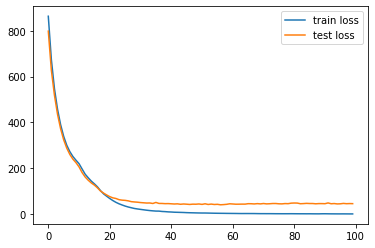

In [33]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [34]:
# Accuracy

n_correct = 0.
n_total = 0.
for inputs, targets in train_iter:
  targets = targets.view(-1, 1).float()

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  predictions = (outputs > 0)
  
  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total


n_correct = 0.
n_total = 0.
for inputs, targets in test_iter:
  targets = targets.view(-1, 1).float()

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  predictions = (outputs > 0)
  
  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.0026, Test acc: 0.0059


/usr/local/lib/python3.7/dist-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)
